# JSON examples and exercise
****
+ get familiar with packages for dealing with JSON
+ study examples with JSON strings and files 
+ work on exercise to be completed and submitted 
****
+ reference: http://pandas.pydata.org/pandas-docs/stable/io.html#io-json-reader
+ data source: http://jsonstudio.com/resources/
****

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

## imports for Python, Pandas

In [2]:
import json
from pandas.io.json import json_normalize

## JSON example, with string

+ demonstrates creation of normalized dataframes (tables) from nested json string
+ source: http://pandas.pydata.org/pandas-docs/stable/io.html#normalization

In [3]:
# define json string
data = [{'state': 'Florida', 
         'shortname': 'FL',
         'info': {'governor': 'Rick Scott'},
         'counties': [{'name': 'Dade', 'population': 12345},
                      {'name': 'Broward', 'population': 40000},
                      {'name': 'Palm Beach', 'population': 60000}]},
        {'state': 'Ohio',
         'shortname': 'OH',
         'info': {'governor': 'John Kasich'},
         'counties': [{'name': 'Summit', 'population': 1234},
                      {'name': 'Cuyahoga', 'population': 1337}]}]

In [4]:
# use normalization to create tables from nested element
json_normalize(data, 'counties')

,name,population
0,Dade,12345
1,Broward,40000
2,Palm Beach,60000
3,Summit,1234
4,Cuyahoga,1337


In [5]:
# further populate tables created from nested element
json_normalize(data, 'counties', ['state', 'shortname', ['info', 'governor']])

,name,population,state,shortname,info.governor
0,Dade,12345,Florida,FL,Rick Scott
1,Broward,40000,Florida,FL,Rick Scott
2,Palm Beach,60000,Florida,FL,Rick Scott
3,Summit,1234,Ohio,OH,John Kasich
4,Cuyahoga,1337,Ohio,OH,John Kasich


****
## JSON example, with file

+ demonstrates reading in a json file as a string and as a table
+ uses small sample file containing data about projects funded by the World Bank 
+ data source: http://jsonstudio.com/resources/

In [6]:
# load json as string
json.load((open('data/world_bank_projects_less.json')))

[{'_id': {'$oid': '52b213b38594d8a2be17c780'},
  'approvalfy': 1999,
  'board_approval_month': 'November',
  'boardapprovaldate': '2013-11-12T00:00:00Z',
  'borrower': 'FEDERAL DEMOCRATIC REPUBLIC OF ETHIOPIA',
  'closingdate': '2018-07-07T00:00:00Z',
  'country_namecode': 'Federal Democratic Republic of Ethiopia!$!ET',
  'countrycode': 'ET',
  'countryname': 'Federal Democratic Republic of Ethiopia',
  'countryshortname': 'Ethiopia',
  'docty': 'Project Information Document,Indigenous Peoples Plan,Project Information Document',
  'envassesmentcategorycode': 'C',
  'grantamt': 0,
  'ibrdcommamt': 0,
  'id': 'P129828',
  'idacommamt': 130000000,
  'impagency': 'MINISTRY OF EDUCATION',
  'lendinginstr': 'Investment Project Financing',
  'lendinginstrtype': 'IN',
  'lendprojectcost': 550000000,
  'majorsector_percent': [{'Name': 'Education', 'Percent': 46},
   {'Name': 'Education', 'Percent': 26},
   {'Name': 'Public Administration, Law, and Justice', 'Percent': 16},
   {'Name': 'Educatio

In [7]:
# load as Pandas dataframe
sample_json_df = pd.read_json('data/world_bank_projects_less.json')
sample_json_df

,_id,approvalfy,board_approval_month,boardapprovaldate,borrower,closingdate,country_namecode,countrycode,countryname,countryshortname,...,sectorcode,source,status,supplementprojectflg,theme1,theme_namecode,themecode,totalamt,totalcommamt,url
0,{'$oid': '52b213b38594d8a2be17c780'},1999,November,2013-11-12T00:00:00Z,FEDERAL DEMOCRATIC REPUBLIC OF ETHIOPIA,2018-07-07T00:00:00Z,Federal Democratic Republic of Ethiopia!$!ET,ET,Federal Democratic Republic of Ethiopia,Ethiopia,...,"ET,BS,ES,EP",IBRD,Active,N,"{'Name': 'Education for all', 'Percent': 100}","[{'name': 'Education for all', 'code': '65'}]",65,130000000,130000000,http://www.worldbank.org/projects/P129828/ethi...
1,{'$oid': '52b213b38594d8a2be17c781'},2015,November,2013-11-04T00:00:00Z,GOVERNMENT OF TUNISIA,NaN,Republic of Tunisia!$!TN,TN,Republic of Tunisia,Tunisia,...,"BZ,BS",IBRD,Active,N,"{'Name': 'Other economic management', 'Percent...","[{'name': 'Other economic management', 'code':...","54,24",0,4700000,http://www.worldbank.org/projects/P144674?lang=en


****
## JSON exercise

Using data in file 'data/world_bank_projects.json' and the techniques demonstrated above,
1. Find the 10 countries with most projects
2. Find the top 10 major project themes (using column 'mjtheme_namecode')
3. In 2. above you will notice that some entries have only the code and the name is missing. Create a dataframe with the missing names filled in.

## 0. Open File and Review Data

In [8]:
pd.set_option('display.max_columns', 500)

with open('data/world_bank_projects.json') as json_file:
    data = json.load(json_file)
df = json_normalize(data)
df.head()

,_id.$oid,approvalfy,board_approval_month,boardapprovaldate,borrower,closingdate,country_namecode,countrycode,countryname,countryshortname,docty,envassesmentcategorycode,grantamt,ibrdcommamt,id,idacommamt,impagency,lendinginstr,lendinginstrtype,lendprojectcost,majorsector_percent,mjsector_namecode,mjtheme,mjtheme_namecode,mjthemecode,prodline,prodlinetext,productlinetype,project_abstract.cdata,project_name,projectdocs,projectfinancialtype,projectstatusdisplay,regionname,sector,sector1.Name,sector1.Percent,sector2.Name,sector2.Percent,sector3.Name,sector3.Percent,sector4.Name,sector4.Percent,sector_namecode,sectorcode,source,status,supplementprojectflg,theme1.Name,theme1.Percent,theme_namecode,themecode,totalamt,totalcommamt,url
0,52b213b38594d8a2be17c780,1999,November,2013-11-12T00:00:00Z,FEDERAL DEMOCRATIC REPUBLIC OF ETHIOPIA,2018-07-07T00:00:00Z,Federal Democratic Republic of Ethiopia!$!ET,ET,Federal Democratic Republic of Ethiopia,Ethiopia,"Project Information Document,Indigenous People...",C,0,0,P129828,130000000,MINISTRY OF EDUCATION,Investment Project Financing,IN,550000000,"[{'Percent': 46, 'Name': 'Education'}, {'Perce...","[{'code': 'EX', 'name': 'Education'}, {'code':...",[Human development],"[{'code': '8', 'name': 'Human development'}, {...","8,11",PE,IBRD/IDA,L,The development objective of the Second Phase ...,Ethiopia General Education Quality Improvement...,"[{'DocDate': '28-AUG-2013', 'EntityID': '09022...",IDA,Active,Africa,"[{'Name': 'Primary education'}, {'Name': 'Seco...",Primary education,46,Secondary education,26.0,Public administration- Other social services,16.0,Tertiary education,12.0,"[{'code': 'EP', 'name': 'Primary education'}, ...","ET,BS,ES,EP",IBRD,Active,N,Education for all,100,"[{'code': '65', 'name': 'Education for all'}]",65,130000000,130000000,http://www.worldbank.org/projects/P129828/ethi...
1,52b213b38594d8a2be17c781,2015,November,2013-11-04T00:00:00Z,GOVERNMENT OF TUNISIA,NaN,Republic of Tunisia!$!TN,TN,Republic of Tunisia,Tunisia,"Project Information Document,Integrated Safegu...",C,4700000,0,P144674,0,MINISTRY OF FINANCE,Specific Investment Loan,IN,5700000,"[{'Percent': 70, 'Name': 'Public Administratio...","[{'code': 'BX', 'name': 'Public Administration...","[Economic management, Social protection and ri...","[{'code': '1', 'name': 'Economic management'},...","1,6",RE,Recipient Executed Activities,L,NaN,TN: DTF Social Protection Reforms Support,"[{'DocDate': '29-MAR-2013', 'EntityID': '00033...",OTHER,Active,Middle East and North Africa,[{'Name': 'Public administration- Other social...,Public administration- Other social services,70,General public administration sector,30.0,NaN,NaN,NaN,NaN,"[{'code': 'BS', 'name': 'Public administration...","BZ,BS",IBRD,Active,N,Other economic management,30,"[{'code': '24', 'name': 'Other economic manage...","54,24",0,4700000,http://www.worldbank.org/projects/P144674?lang=en
2,52b213b38594d8a2be17c782,2014,November,2013-11-01T00:00:00Z,MINISTRY OF FINANCE AND ECONOMIC DEVEL,NaN,Tuvalu!$!TV,TV,Tuvalu,Tuvalu,"Resettlement Plan,Environmental Assessment,Int...",B,0,0,P145310,6060000,MINISTRY OF TRANSPORT AND COMMUNICATIONS,Investment Project Financing,IN,6060000,"[{'Percent': 100, 'Name': 'Transportation'}]","[{'code': 'TX', 'name': 'Transportation'}]","[Trade and integration, Public sector governan...","[{'code': '5', 'name': 'Trade and integration'...","5,2,11,6",PE,IBRD/IDA,L,NaN,Tuvalu Aviation Investment Project - Additiona...,"[{'DocDate': '21-OCT-2013', 'EntityID': '00033...",IDA,Active,East Asia and Pacific,[{'Name': 'Rural and Inter-Urban Roads and Hig...,Rural and Inter-Urban Roads and Highways,100,NaN,NaN,NaN,NaN,NaN,NaN,"[{'code': 'TI', 'name': 'Rural and Inter-Urban...",TI,IBRD,Active,Y,Regional integration,46,"[{'code': '47', 'name': 'Regional integration'...","52,81,25,47",6060000,6060000,http://www.worldbank.org/projects/P145310?lang=en
3,52b213b38594d8a2be17c783,2014,October,2013-10-31T00:00:00Z,MIN. OF PLANNING AND INT'L COOPERATION,NaN,R

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 55 columns):
_id.$oid                    500 non-null object
approvalfy                  500 non-null object
board_approval_month        500 non-null object
boardapprovaldate           500 non-null object
borrower                    485 non-null object
closingdate                 370 non-null object
country_namecode            500 non-null object
countrycode                 500 non-null object
countryname                 500 non-null object
countryshortname            500 non-null object
docty                       446 non-null object
envassesmentcategorycode    430 non-null object
grantamt                    500 non-null int64
ibrdcommamt                 500 non-null int64
id                          500 non-null object
idacommamt                  500 non-null int64
impagency                   472 non-null object
lendinginstr                495 non-null object
lendinginstrtype            495 no

## 1. Find the 10 countries with the most projects

It seems there are 4 fields that define the country associated with a project
 - country_namecode
 - countrycode
 - countryname
 - countryshortname
 
Checking Data Quality & Consistency
1. There are no null values in any of these 4 columns
2. If the data within these fields is consistent, and the coding accurate, then the number of unique values in these fields should all be equal. This crude test should give an indication of the data quality and consistency
3. The countryname field gives the full name, and is still reasonably readable, so I will use this for the analysis

In [10]:
print(df['country_namecode'].nunique() == df['countrycode'].nunique())
print(df['country_namecode'].nunique()== df['countryname'].nunique())
print(df['country_namecode'].nunique()== df['countryshortname'].nunique())

True
True
True


In [11]:
print(f"countryname number of unique values: {df['countryname'].nunique()}")

countryname number of unique values: 118


In [12]:
top_10_countries = df['countryname'].value_counts().head(10)
top_10_countries

Republic of Indonesia              19
People's Republic of China         19
Socialist Republic of Vietnam      17
Republic of India                  16
Republic of Yemen                  13
Nepal                              12
Kingdom of Morocco                 12
People's Republic of Bangladesh    12
Africa                             11
Republic of Mozambique             11
Name: countryname, dtype: int64

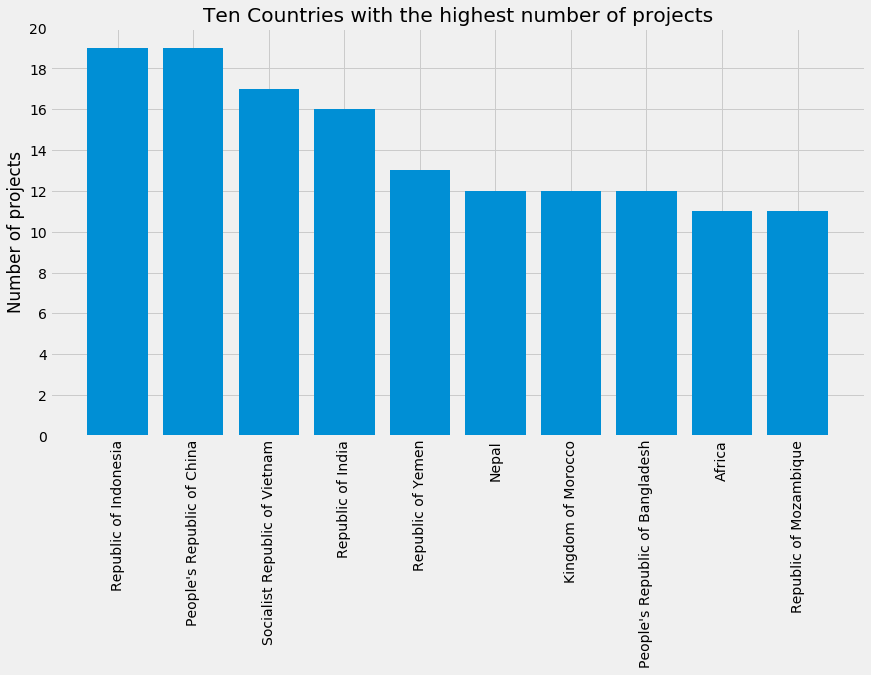

In [13]:
plt.style.use('fivethirtyeight')
figsize = (13,7)
yticks = np.arange(0,22,2)
ylim = (0,20)
rotation=90

fig, ax = plt.subplots(figsize=figsize)
ax.bar(top_10_countries.index, top_10_countries.values)

plt.xticks(rotation=rotation)
ax.set_ylabel('Number of projects')
ax.set_title("Ten Countries with the highest number of projects")
ax.set_yticks(yticks)
ax.set_ylim(ylim)
plt.show();

### Additional Note to Q1

There is a problem with this data in that number 10 on this list - `Africa` is a continent, not a country

We should take a look at these projects, and see if anything jumps out

In [14]:
df[df['countryname'] == 'Africa']

,_id.$oid,approvalfy,board_approval_month,boardapprovaldate,borrower,closingdate,country_namecode,countrycode,countryname,countryshortname,docty,envassesmentcategorycode,grantamt,ibrdcommamt,id,idacommamt,impagency,lendinginstr,lendinginstrtype,lendprojectcost,majorsector_percent,mjsector_namecode,mjtheme,mjtheme_namecode,mjthemecode,prodline,prodlinetext,productlinetype,project_abstract.cdata,project_name,projectdocs,projectfinancialtype,projectstatusdisplay,regionname,sector,sector1.Name,sector1.Percent,sector2.Name,sector2.Percent,sector3.Name,sector3.Percent,sector4.Name,sector4.Percent,sector_namecode,sectorcode,source,status,supplementprojectflg,theme1.Name,theme1.Percent,theme_namecode,themecode,totalamt,totalcommamt,url
45,52b213b38594d8a2be17c7ad,2014,September,2013-09-12T00:00:00Z,ECOWAS,NaN,Africa!$!3A,3A,Africa,Africa,"Project Information Document,Integrated Safegu...",C,10000000,0,P125018,0,WAHO,Investment Project Financing,IN,10750000,"[{'Percent': 100, 'Name': 'Health and other so...","[{'code': 'JX', 'name': 'Health and other soci...",[Human development],"[{'code': '8', 'name': 'Human development'}, {...","8,10",RE,Recipient Executed Activities,L,NaN,West Africa Regional Disease Surveillance Cap...,"[{'DocDate': '28-MAR-2013', 'EntityID': '09022...",OTHER,Active,Africa,[{'Name': 'Health'}],Health,100,NaN,NaN,NaN,NaN,NaN,NaN,"[{'code': 'JA', 'name': 'Health'}]",JA,IBRD,Active,N,Health system performance,100,"[{'code': '67', 'name': 'Health system perform...",67,0,10000000,http://www.worldbank.org/projects/P125018/west...
46,52b213b38594d8a2be17c7ae,2014,September,2013-09-10T00:00:00Z,UGANDA-COMOROS,2018-06-30T00:00:00Z,Africa!$!3A,3A,Africa,Africa,"Financing Agreement,Disbursement Letter,Projec...",B,0,0,P118213,22000000,RELEVANT MINISTRIES IN CHARGE OF TELECOM/ICT P...,Adaptable Program Loan,IN,22000000,"[{'Percent': 60, 'Name': 'Information and comm...","[{'code': 'CX', 'name': 'Information and commu...","[Public sector governance, Rural development, ...","[{'code': '2', 'name': 'Public sector governan...","2,10,4,4",PE,IBRD/IDA,L,The development objectives of Fourth Phase of ...,RCIP4 - Regional Communications Infrastructure...,"[{'DocDate': '24-SEP-2013', 'EntityID': '09022...",IDA,Active,Africa,"[{'Name': 'Telecommunications'}, {'Name': 'Inf...",Telecommunications,60,Information technology,30.0,Public administration- Information and communi...,10.0,NaN,NaN,"[{'code': 'CT', 'name': 'Telecommunications'},...","BM,CA,CT",IBRD,Active,N,Administrative and civil service reform,20,"[{'code': '25', 'name': 'Administrative and ci...","39,40,78,25",22000000,22000000,http://www.worldbank.org/projects/P118213/rcip...
51,52b213b38594d8a2be17c7b3,2014,September,2013-09-04T00:00:00Z,"OSS, IUCN, CILSS",NaN,Africa!$!3A,3A,Africa,Africa,"Project Appraisal Document,Project Information...",C,4630000,0,P130888,0,"OSS, IUCN, CILSS/AGRYHMET",Specific Investment Loan,IN,4630000,"[{'Percent': 50, 'Name': 'Water, sanitation an...","[{'code': 'WX', 'name': 'Water, sanitation and...","[Environment and natural resources management,...","[{'code': '11', 'name': 'Environment and natur...","11,11,11,11,11",GE,Global Environment Project,L,The objective of the Building Resilience throu...,"Building Resilience through Innovation, Commun...","[{'DocDate': '09-AUG-2013', 'EntityID': '00033...",OTHER,Active,Africa,"[{'Name': 'General water, sanitation and flood...","General water, sanitation and flood protection...",50,"General agriculture, fishing and forestry sector",20.0,Agricultural extension and research,20.0,Irrigation and drainage,10.0,"[{'code': 'WZ', 'name': 'General water, sanita...","AI,AB,AZ,WZ",IBRD,Active,N,Biodiversity,20,"[{'code': '80', 'name': 'Biodiversity'}, {'cod...","85,82,81,83,80",0,4630000,http://www.worldbank.org/projects/P130888/buil...
58,52b213b38594d8a2be17c7ba,2014,August,2013-08-28T00:00:00Z,BANK EXECUTED,NaN,Africa!$!3A,3A,Africa,Africa,NaN,C,2000000,0,P144902,0,BANK EXECUTED,Specific Investment Loan,IN,3800000,

Inspection of the `borrower` column provides some insight into the associated country for the project, but unfortunately this field is not consistent

Therefore, the best answer I can find is the `top_10_countries` displayed above 

## 2. Find the top 10 major project themes (using column 'mjtheme_namecode')


Inspection of the json sample shows that the field `mjtheme_namecode` contains an arbitrarily sized list of dictionaries where each dictionary is structured like this: `{'name': 'Human development', 'code': '8'}`

Convert these lists of dictionaries to a flat dataframe

Include the project id, because we should ensure that there are no duplicate codes within each project

I assume that if we have duplicate major themes within a project, this is an error and needs to be cleaned up prior to analysis


In [15]:
df_mj = json_normalize(data, 'mjtheme_namecode', ['id'])
df_mj.head(15)

,code,name,id
0,8,Human development,P129828
1,11,,P129828
2,1,Economic management,P144674
3,6,Social protection and risk management,P144674
4,5,Trade and integration,P145310
5,2,Public sector governance,P145310
6,11,Environment and natural resources management,P145310
7,6,Social protection and risk management,P145310
8,7,Social dev/gender/inclusion,P144665
9,7,Social dev/gender/inclusion,P144665


Inspecting this DataFrame, I see that there are duplicate codes at index `12`, and `13` for project `id P146161`

Same for index `8` and `9`

So, before running any analyses, we should remove duplicate `mjtheme_namecode`s within the same project

In [16]:
df_mj.shape

(1499, 3)

In [17]:
df_mj = df_mj.drop_duplicates(subset = ['code', 'id'], keep='first')
# Drop the project id column - we don't need it any more
df_mj = df_mj[['code', 'name']]

In [18]:
df_mj.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1070 entries, 0 to 1498
Data columns (total 2 columns):
code    1070 non-null object
name    1070 non-null object
dtypes: object(2)
memory usage: 25.1+ KB


In [19]:
# look at the first gap in the `name` column
len(df_mj.loc[1, 'name'])

0

The above shows that the `name` column is treating an empty string as a value

If we convert the `code` column to a `int` type then any empty cells will show up as NaNs

This will allow us to see if there are any missing codes

In [20]:
df_mj['code'] = df_mj['code'].astype(int)
df_mj.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1070 entries, 0 to 1498
Data columns (total 2 columns):
code    1070 non-null int64
name    1070 non-null object
dtypes: int64(1), object(1)
memory usage: 65.1+ KB


This is helpful - There are no null values in the `code` column of `df_mj`, so we can find the top 10 major project themes, but only by their code

In [21]:
df_10_mjs = df_mj['code'].value_counts().head(10)
df_10_mjs

11    157
10    148
2     140
8     128
4     119
6     116
7     114
5      61
9      40
1      33
Name: code, dtype: int64

## 3. In 2. above you will notice that some entries have only the code and the name is missing. Create a dataframe with the missing names filled in.

Look at the possible values that `name` can take

In [22]:
df_mj['name'].unique()

array(['Human development', '', 'Economic management',
       'Social protection and risk management', 'Trade and integration',
       'Public sector governance',
       'Environment and natural resources management',
       'Social dev/gender/inclusion',
       'Financial and private sector development', 'Rural development',
       'Urban development', 'Rule of law'], dtype=object)

How many unique values can `name` take NOT including an empty string?

In [23]:
len_unique_names = df_mj['name'].nunique() - 1 # subtract 1 to remove the empty string value
len_unique_names

11

Form a mapping dictionary where the key is the `code`, and the value is the `name`.

Use an if condition to screen out empty strings

In [24]:
# This assumes that the names, where they exist, are consistently matched to the keys
mapping_dict = {k:v for (k,v) in df_mj.values if v != ''}
mapping_dict

{8: 'Human development',
 1: 'Economic management',
 6: 'Social protection and risk management',
 5: 'Trade and integration',
 2: 'Public sector governance',
 11: 'Environment and natural resources management',
 7: 'Social dev/gender/inclusion',
 4: 'Financial and private sector development',
 10: 'Rural development',
 9: 'Urban development',
 3: 'Rule of law'}

We should have the same number of dictionary items as the number of `name` unique values - Also the same number of `code`s

In [25]:
len(mapping_dict) == len_unique_names == df_mj['code'].nunique()

True

### a) Map a Dictionary to fill in the blanks

Form a dataframe where the name column does not contain any blanks

In [26]:
df_mj_full = df_mj.copy(deep=True)
df_mj_full['name'] = df_mj['code'].map(mapping_dict)
df_mj_full.head(15)

,code,name
0,8,Human development
1,11,Environment and natural resources management
2,1,Economic management
3,6,Social protection and risk management
4,5,Trade and integration
5,2,Public sector governance
6,11,Environment and natural resources management
7,6,Social protection and risk management
8,7,Social dev/gender/inclusion
10,5,Trade and integration


### b) Apply a lambda function to fill in the blanks

In [27]:
df_mj_full2 = df_mj.copy(deep=True)
df_mj_full2['name'] = df_mj_full2['code'].apply(lambda x: mapping_dict[x] )
df_mj_full2.head(15)

,code,name
0,8,Human development
1,11,Environment and natural resources management
2,1,Economic management
3,6,Social protection and risk management
4,5,Trade and integration
5,2,Public sector governance
6,11,Environment and natural resources management
7,6,Social protection and risk management
8,7,Social dev/gender/inclusion
10,5,Trade and integration


### c) Apply a function to fill in the blanks

In [28]:
df_mj_full3 = df_mj.copy(deep=True)

def fill_blanks(row):
    if row["name"] == "":
        row["name"] = mapping_dict[row["code"]]
    return row

df_mj_full3['name'] = df_mj_full3[['name', 'code']].apply(fill_blanks, axis=1)
df_mj_full3.head(15)

,code,name
0,8,Human development
1,11,Environment and natural resources management
2,1,Economic management
3,6,Social protection and risk management
4,5,Trade and integration
5,2,Public sector governance
6,11,Environment and natural resources management
7,6,Social protection and risk management
8,7,Social dev/gender/inclusion
10,5,Trade and integration
